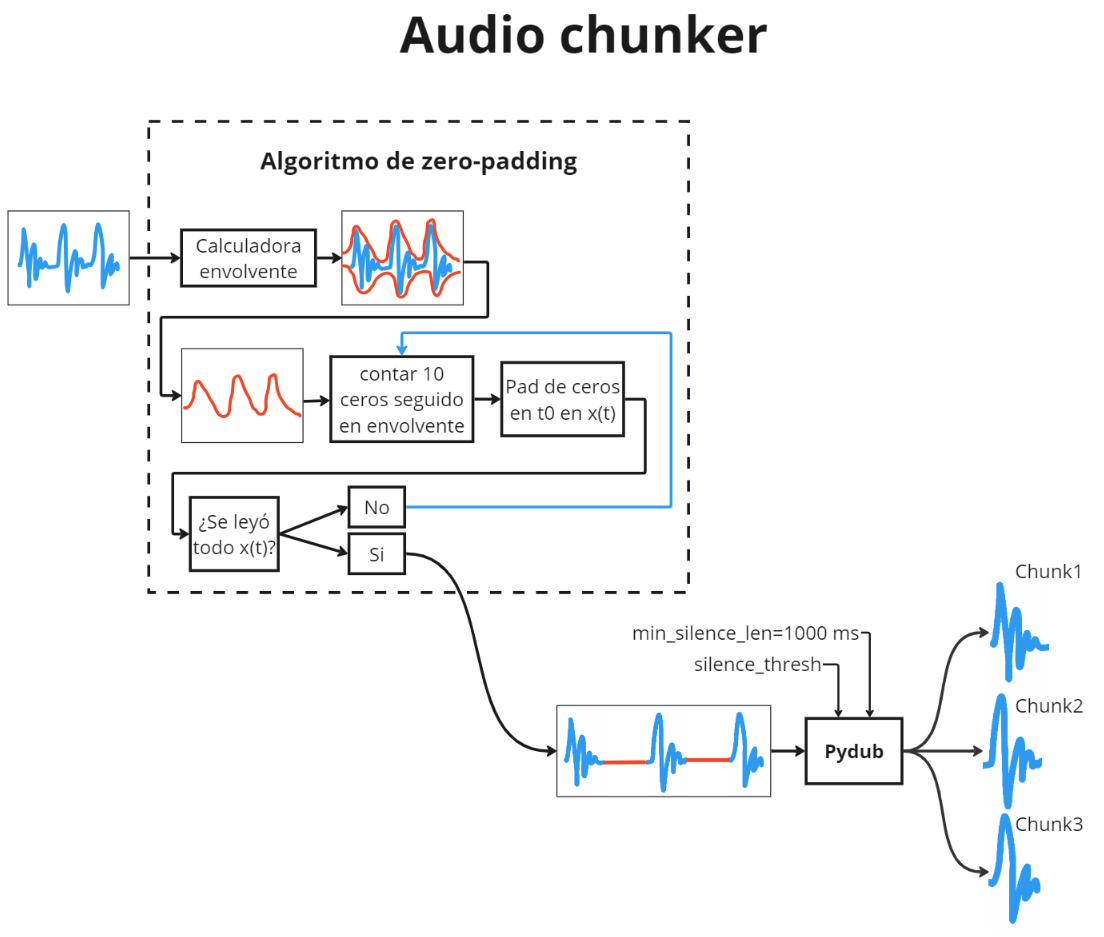

## Hilbert

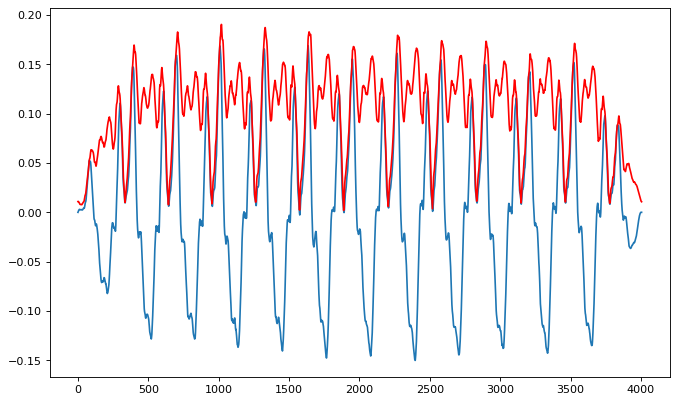

In [3]:
import numpy as np
from scipy.signal import hilbert, chirp
import matplotlib.pyplot as plt
import soundfile as sf

path = 'C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/AudioChunker/ooooo.wav'
x,fs = sf.read(path)

plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x) #plot the modulated signal

z = hilbert(x) #form the analytical signal
inst_amplitude = np.abs(z) #envelope extraction
inst_phase = np.unwrap(np.angle(z))#inst phase
inst_freq = np.diff(inst_phase)/(2*np.pi)*fs #inst frequency

plt.plot(inst_amplitude,'r'); #overlay the extracted envelope

# Calculadora de envolvente

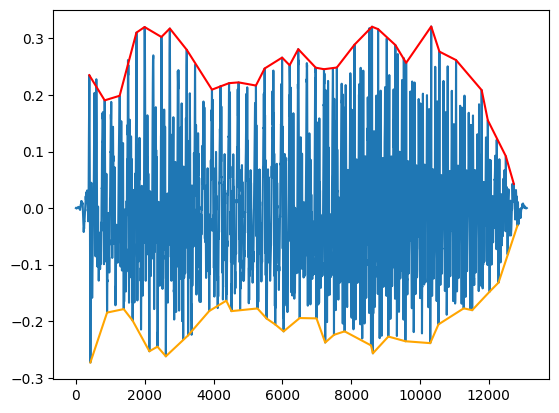

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

def hl_envelopes_idx(s, dmin, dmax, split=False):
    """
    Input :
    s: 1d-array, data signal from which to extract high and low envelopes
    dmin, dmax: int, optional, size of chunks, use this if the size of the input signal is too big
    split: bool, optional, if True, split the signal in half along its mean, might help to generate the envelope in some cases
    Output :
    lmin,lmax : high/low envelope idx of input signal s
    """

    # locals min      
    lmin = (np.diff(np.sign(np.diff(s))) > 0).nonzero()[0] + 1 
    # locals max
    lmax = (np.diff(np.sign(np.diff(s))) < 0).nonzero()[0] + 1 
    
    if split:
        # s_mid is zero if s centered around x-axis or more generally mean of signal
        s_mid = np.mean(s) 
        # pre-sorting of locals min based on relative position with respect to s_mid 
        lmin = lmin[s[lmin]<s_mid]
        # pre-sorting of local max based on relative position with respect to s_mid 
        lmax = lmax[s[lmax]>s_mid]

    # global min of dmin-chunks of locals min 
    lmin = lmin[[i+np.argmin(s[lmin[i:i+dmin]]) for i in range(0,len(lmin),dmin)]]
    # global max of dmax-chunks of locals max 
    lmax = lmax[[i+np.argmax(s[lmax[i:i+dmax]]) for i in range(0,len(lmax),dmax)]]
    
    return lmin,lmax

path = 'C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/AudioChunker/recorte.wav'
s,fs = sf.read(path)

t = np.arange(0,len(s),1)
lmin, lmax = hl_envelopes_idx(s,dmin=25,dmax=25)

# plot
plt.plot(t,s,label='signal')
plt.plot(t[lmin], s[lmin], 'orange', label='low')
plt.plot(t[lmax], s[lmax], 'red', label='high')

# Derivada

In [5]:
import numpy as np
y = [-16,-9,-4,-1,0,1,4,9,16]
print(len(y))
dy = np.diff(y)
print(dy)

9
[7 5 3 1 1 3 5 7]


9
9


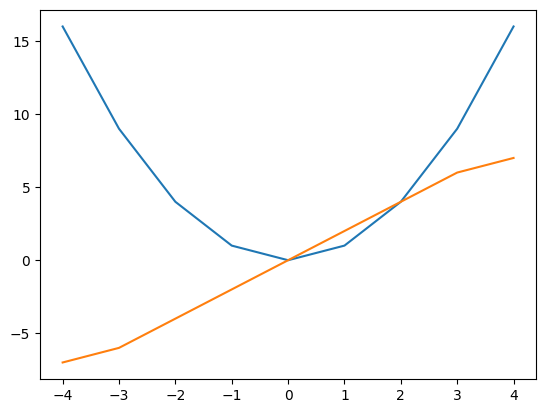

In [6]:
import numpy as np
import matplotlib.pyplot as plt

y = [16,9,4,1,0,1,4,9,16]
print(len(y))

dy = np.gradient(y)
print(len(dy))

plt.plot([-4,-3,-2,-1,0,1,2,3,4],y)
plt.plot([-4,-3,-2,-1,0,1,2,3,4],dy)

# Audio chunker

In [7]:
def hl_envelopes_idx(s, dmin, dmax, split=False):
    """
    Input :
    s: 1d-array, data signal from which to extract high and low envelopes
    dmin, dmax: int, optional, size of chunks, use this if the size of the input signal is too big
    split: bool, optional, if True, split the signal in half along its mean, might help to generate the envelope in some cases
    Output :
    lmin,lmax : high/low envelope idx of input signal s
    """

    # locals min      
    lmin = (np.diff(np.sign(np.diff(s))) > 0).nonzero()[0] + 1 
    # locals max
    lmax = (np.diff(np.sign(np.diff(s))) < 0).nonzero()[0] + 1 
    
    if split:
        # s_mid is zero if s centered around x-axis or more generally mean of signal
        s_mid = np.mean(s) 
        # pre-sorting of locals min based on relative position with respect to s_mid 
        lmin = lmin[s[lmin]<s_mid]
        # pre-sorting of local max based on relative position with respect to s_mid 
        lmax = lmax[s[lmax]>s_mid]

    # global min of dmin-chunks of locals min 
    lmin = lmin[[i+np.argmin(s[lmin[i:i+dmin]]) for i in range(0,len(lmin),dmin)]]
    # global max of dmax-chunks of locals max 
    lmax = lmax[[i+np.argmax(s[lmax[i:i+dmax]]) for i in range(0,len(lmax),dmax)]]
    
    return lmin,lmax

ValueError: s must be a scalar, or float array-like with the same size as x and y

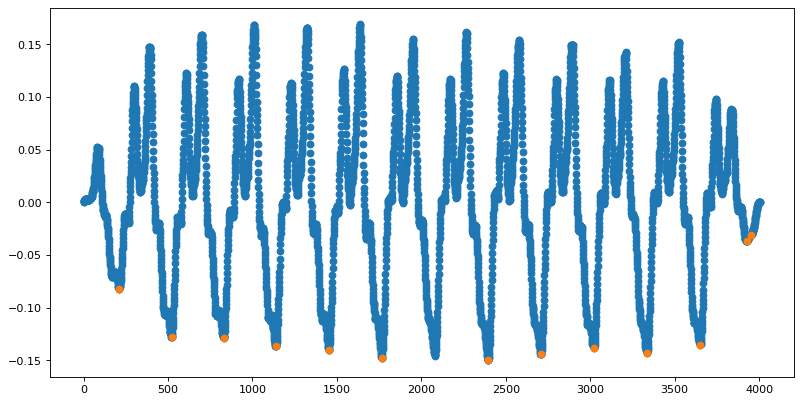

In [8]:
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np

path = 'C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/AudioChunker/ooooo.wav'
s,fs = sf.read(path)
t = np.arange(0,len(s),1)
lmin, lmax = hl_envelopes_idx(s,dmin=10,dmax=10)

plt.figure(figsize=(12, 6), dpi=80)

# print(len(t))
# print(len(lmin))

# plt.plot(t,s)
# plt.plot(t[lmin], s[lmin])
# plt.plot(t[lmax],s[lmax], 'red', label='high')

plt.scatter(t,s)
plt.scatter(t[lmin], s[lmin])
plt.scatter(t[lmax],s[lmax], 'red', label='high')